# Task 5

In [ ]:
#Loading libraries
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, SpatialDropout2D, BatchNormalization, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adagrad, SGD, RMSprop
from keras.losses import CategoricalCrossentropy
from keras.metrics import BinaryAccuracy

In [ ]:
# Loading the data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Train split to validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)
# Normalizing the data
x_train = x_train.astype('float32') / 255 
x_valid = x_valid.astype('float32') / 255
x_test  = x_test.astype('float32') / 255

# One - Hot - Key Coding
N = 10
y_train = to_categorical(y_train, N).reshape(-1, 1, 1, N)
y_valid = to_categorical(y_valid, N).reshape(-1, 1, 1, N)
y_test = to_categorical(y_test, N).reshape(-1, 1, 1, N)

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
# Defining Nureal Network Model
def Model(dropOutRate = 0.2):
  print(dropOutRate)
  model = Sequential()  
  model.add(Conv2D(64, kernel_size=(3,3), strides = 2, padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(SpatialDropout2D(rate = dropOutRate))
  model.add(Activation('relu'))
    

  model.add(Conv2D(192, kernel_size=(5,5), strides = 2, padding='same'))
  model.add(BatchNormalization())
  model.add(SpatialDropout2D(rate = dropOutRate))
  model.add(Activation('relu'))


  model.add(Conv2D(384, kernel_size=(3,3), strides = 2, padding='same'))
  model.add(BatchNormalization())
  model.add(SpatialDropout2D(rate = dropOutRate))
  model.add(Activation('relu'))

  model.add(Conv2D(256, kernel_size=(5,5), strides = 2, padding='same'))
  model.add(BatchNormalization())
  model.add(SpatialDropout2D(rate = dropOutRate))
  model.add(Activation('relu'))
        
  model.add(Conv2D(256, kernel_size=(5,5), strides = 2, padding='same'))
  model.add(BatchNormalization())
  model.add(SpatialDropout2D(rate = dropOutRate))
  model.add(Activation('relu'))

    

  model.add(Conv2D(4096, kernel_size = (1,1), strides = 1, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(rate = 0.5))
              

  model.add(Conv2D(4096, kernel_size = (1,1), strides = 1, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(rate = 0.5))         
    

  model.add(Conv2D(10, kernel_size = (1,1), strides = 1, padding='same'))
  model.add(Activation('softmax'))
  return model

In [ ]:
# Training of Model
batch_dic = {}
score_dic = {}

dropout_rates = [0.2]  

# Model Instances 
sgd   = SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

model = []
for i in range(len(dropout_rates)):
  model.append(Model(dropout_rates[i]))
  model[i].compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

0.2
0.4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range = 10, # rotation
        zoom_range = 0.2, # zoom
        horizontal_flip = True, # horizontal flip
        brightness_range = [0.2,1.2],
        ) # brightness
# datagen.fit(x_train)

In [ ]:
epochs = 100
batch_size = 32
for idx, val in enumerate(dropout_rates):
  print('Iteration ----> ', idx, '<->', val)
  batch_dic[val] = model[idx].fit(datagen.flow(x_train, y_train, batch_size=batch_size), 
                    epochs=epochs, # one forward/backward pass of training data
                    #steps_per_epoch=x_train.shape[0]//batch_size, # number of images comprising of one epoch
                    validation_data = datagen.flow(x_test, y_test, batch_size=batch_size) # data for validation
                    ) # validation_steps=x_test.shape[0]//batch_size
  score_dic[val] = model[idx].evaluate(x_test, y_test, verbose=0)

Iteration ---->  0 <-> 0.2
Epoch 1/100
1250/1250 [==============================] - 62s 26ms/step - loss: 2.5211 - accuracy: 0.1538 - val_loss: 1.8011 - val_accuracy: 0.3425
Epoch 2/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.9507 - accuracy: 0.2848 - val_loss: 1.6110 - val_accuracy: 0.4080
Epoch 3/100
1250/1250 [==============================] - 32s 25ms/step - loss: 1.7769 - accuracy: 0.3464 - val_loss: 1.5107 - val_accuracy: 0.4489
Epoch 4/100
1250/1250 [==============================] - 30s 24ms/step - loss: 1.6750 - accuracy: 0.3922 - val_loss: 1.4613 - val_accuracy: 0.4658
Epoch 5/100
1250/1250 [==============================] - 32s 26ms/step - loss: 1.6231 - accuracy: 0.4121 - val_loss: 1.4216 - val_accuracy: 0.4877
Epoch 6/100
1250/1250 [==============================] - 33s 26ms/step - loss: 1.5526 - accuracy: 0.4407 - val_loss: 1.3330 - val_accuracy: 0.5201
Epoch 7/100
1250/1250 [==============================] - 30s 24ms/step - loss: 1.5086 - acc

KeyboardInterrupt: ignored

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 148 kB 12.6 MB/s 


<Figure size 432x288 with 0 Axes>

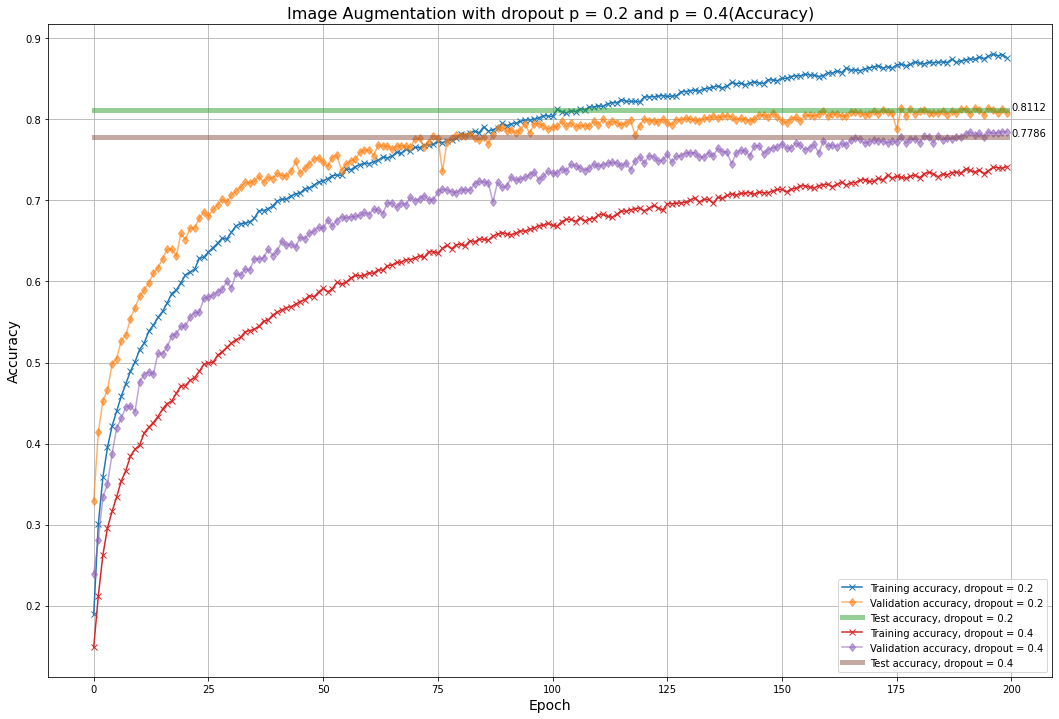

<Figure size 432x288 with 0 Axes>

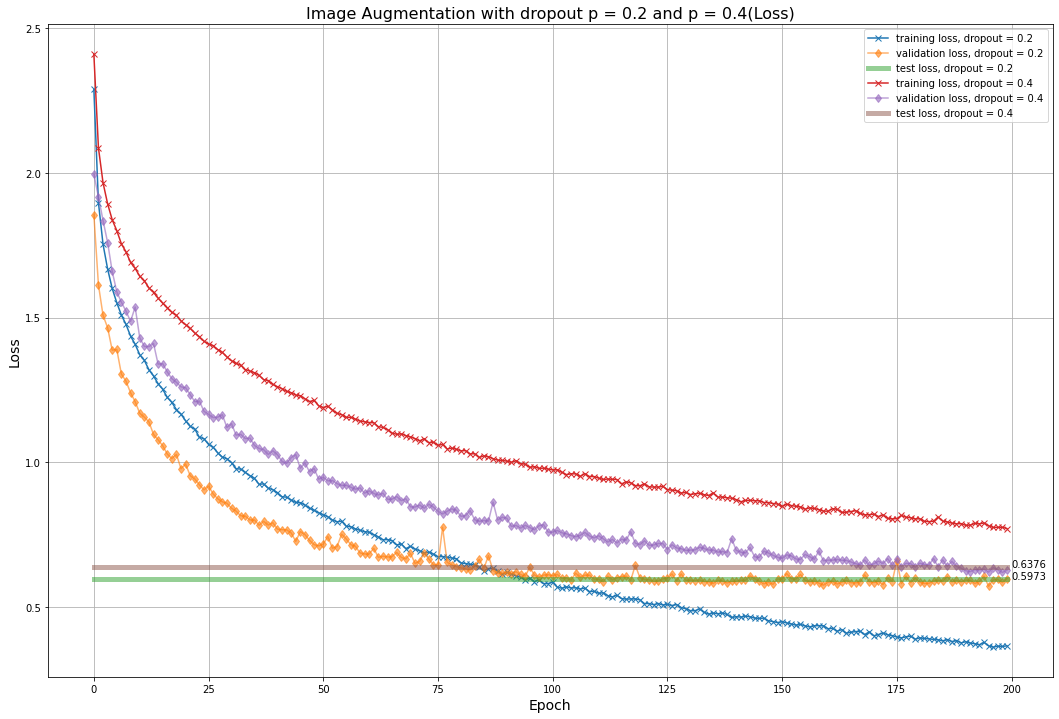

In [ ]:
modelName = 'Image Augmentation with dropout p = 0.2 and p = 0.4'

# Plotting the graphs and saving it

plt.figure(1)
plt.figure(figsize = (18, 12))
for idx, val in enumerate(dropout_rates):
  plt.plot(batch_dic[val].history['accuracy'], marker = 'x', label='Training accuracy, dropout = {batch}'.format(batch = val))
  plt.plot(batch_dic[val].history['val_accuracy'], marker = "d", alpha = 0.6, label='Validation accuracy, dropout = {batch}'.format(batch = val))
  plt.plot(np.ones((epochs,1)) * score_dic[val][1], linewidth = 5, alpha = 0.5, label = 'Test accuracy, dropout = {batch}'.format(batch = val))
  plt.annotate("{:.4f}".format(score_dic[val][1]), xy=(epochs, score_dic[val][1]), xytext=(epochs, score_dic[val][1]))
plt.title('{modelName}(Accuracy)'.format(modelName = modelName), fontsize = 16)
plt.grid()
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend(loc='best')
plt.savefig('{modelName}(Accuracy).png'.format(modelName = modelName))
plt.show()



plt.figure(2)
plt.figure(figsize = (18, 12))
for idx, val in enumerate(dropout_rates):
  plt.plot(batch_dic[val].history['loss'], marker='x', label='training loss, dropout = {batch}'.format(batch = val))
  plt.plot(batch_dic[val].history['val_loss'], marker='d',  alpha = 0.6, label='validation loss, dropout = {batch}'.format(batch = val))
  plt.plot(np.ones((epochs,1)) * score_dic[val][0], linewidth = 5, alpha = 0.5, label = 'test loss, dropout = {batch}'.format(batch = val))
  plt.annotate("{:.4f}".format(score_dic[val][0]), xy=(epochs, score_dic[val][0]), xytext=(epochs, score_dic[val][0]))
plt.title('{modelName}(Loss)'.format(modelName = modelName), fontsize = 16)
plt.grid()
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.legend(loc='best')
plt.savefig('{modelName}(Loss).png'.format(modelName = modelName))
plt.show()


#-------------------------------------------Saving records-------------------------------------------
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('{}.xlsx'.format(modelName), engine='xlsxwriter')
df = pd.DataFrame(columns = ['loss', 'accuracy', 'val_loss' , 'val_accuracy'])
# df['dropout_rate'] = dropout_rates[0]

for idx, val in enumerate(dropout_rates):
  temp = pd.DataFrame(batch_dic[val].history, columns = ['loss', 'accuracy', 'val_loss' , 'val_accuracy'])
  temp['dropout_rate'] = str(val)
  df = df.append(temp)

 
df.to_excel(writer, sheet_name = 'Records')

#--------------------------------------------Saving scores----------------------------------------------
df_score = pd.DataFrame()
# df_score = df_score.T
# df_score['dropout_rate'] = dropout_rates[0]
for idx, val in enumerate(dropout_rates):
  temp = pd.DataFrame(score_dic[val])
  temp = temp.T
  temp['dropout_rate'] = str(val)
  df_score = df_score.append(temp)
 
df_score = df_score.append(temp)



df_score.rename(columns={0: "Loss", 1: "Accuracy"}, inplace=True)
df_score.to_excel(writer, sheet_name = 'Scores')


# Close the Pandas Excel writer and output the Excel file.
writer.save()


In [ ]:
score_dic

{0.2: [0.6344735026359558, 0.7858999967575073]}